In [1]:
# STUDENT: MOLTO, JOAQUIN (PID: 6119985)
# COURSE: EEL6812 - ADVANCED TOPICS IN NEURAL NETWORKS (DEEP LEARNING)
# ASSIGNMENT #3: RECURRENT NEURAL NETWORK AND LONG SHORT-TERM MEMORY NETWORKS
# DUE DATE: 04/26/2024

---

<center> RETRIEVING DATA FROM <b>GEFCOM2014(E,V2)</b> AND PREPARING IT FOR THE RNN/LSTM </center>

---

In [2]:
# THE FIRST PORTION OF THIS JUPYTER NOTEBOOK (.IPYNB) WAS PROVIDED BY DR. BARRETO FOR DATA EXTRACTION AND PREPROCESSING
# IT WILL BE USED AS A HELPER IN DEVELOPING THE RNN AND LSTM SOLUTIONS PER THE PROBLEM SPECIFICATION

In [ ]:
# IMPORT NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('./rose-pine-moon.mplstyle')
import os
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LambdaCallback, EarlyStopping
import sklearn
from sklearn.metrics import mean_absolute_error

!wget https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip # retrieve the zip file from the Internet from the given URL

In [4]:
!unzip GEFCom2014.zip # OS-level command to unzip the file brought into the Google Colab temporary file ecosystem

Archive:  GEFCom2014.zip
replace GEFCom2014 Data/GEFCom2014-S_V2.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: GEFCom2014 Data/GEFCom2014-S_V2.zip  
 extracting: GEFCom2014 Data/GEFCom2014-W_V2.zip  
  inflating: GEFCom2014 Data/READ ME_V2.txt  
  inflating: GEFCom2014 Data/Provisional_Leaderboard_V2.xlsx  
 extracting: GEFCom2014 Data/GEFCom2014-L_V2.zip  
 extracting: GEFCom2014 Data/GEFCom2014-E_V2.zip  
 extracting: GEFCom2014 Data/GEFCom2014-P_V2.zip  


In [5]:
!ls -l # UNIX command to list files in directory, passing the -l flag (long)

total 377904
-rw-r--r-- 1 root root   1494839 Apr 28 16:23  best_model.keras
-rw-r--r-- 1 root root   1573348 Apr 28 16:18  GEF14.csv
drwxrwxr-x 2 root root      4096 Apr 28 16:34 'GEFCom2014 Data'
-rw-rw-r-- 1 root root   2348089 Feb 11  2016  GEFCom2014-E_V2.zip
-rw-r--r-- 1 root root   2452214 Jan 25  2016  GEFCom2014-E.xlsx
-rw-r--r-- 1 root root 126360077 Apr 28 15:40  GEFCom2014.zip
-rw-r--r-- 1 root root 126360077 Apr 28 16:18  GEFCom2014.zip.1
-rw-r--r-- 1 root root 126360077 Apr 28 16:33  GEFCom2014.zip.2
drwxr-xr-x 1 root root      4096 Apr 25 13:25  sample_data


In [6]:
!ls -l 'GEFCom2014 Data'/

total 123420
-rw-rw-r-- 1 root root  2348089 Feb 11  2016  GEFCom2014-E_V2.zip
-rw-rw-r-- 1 root root  2599214 Feb 11  2016  GEFCom2014-L_V2.zip
-rw-rw-r-- 1 root root  3338992 Feb 11  2016  GEFCom2014-P_V2.zip
-rw-rw-r-- 1 root root 36734790 Feb 11  2016  GEFCom2014-S_V2.zip
-rw-rw-r-- 1 root root 81149634 Feb 11  2016  GEFCom2014-W_V2.zip
-rw-rw-r-- 1 root root   195932 Feb 11  2016  Provisional_Leaderboard_V2.xlsx
-rw-rw-r-- 1 root root      389 Feb 11  2016 'READ ME_V2.txt'


##### We want to use **GEFCom2014-E_V2.zip** for this project

In [7]:
!mv  'GEFCom2014 Data'/GEFCom2014-E_V2.zip  ./ # let's bring it to the top level before unzipping it

In [8]:
!unzip GEFCom2014-E_V2.zip

Archive:  GEFCom2014-E_V2.zip
replace GEFCom2014-E.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: GEFCom2014-E.xlsx       


In [9]:
!ls -l # we can now verify that we loaded the file GEFCom2014-E.xlsx

total 377904
-rw-r--r-- 1 root root   1494839 Apr 28 16:23  best_model.keras
-rw-r--r-- 1 root root   1573348 Apr 28 16:18  GEF14.csv
drwxrwxr-x 2 root root      4096 Apr 28 16:34 'GEFCom2014 Data'
-rw-rw-r-- 1 root root   2348089 Feb 11  2016  GEFCom2014-E_V2.zip
-rw-r--r-- 1 root root   2452214 Jan 25  2016  GEFCom2014-E.xlsx
-rw-r--r-- 1 root root 126360077 Apr 28 15:40  GEFCom2014.zip
-rw-r--r-- 1 root root 126360077 Apr 28 16:18  GEFCom2014.zip.1
-rw-r--r-- 1 root root 126360077 Apr 28 16:33  GEFCom2014.zip.2
drwxr-xr-x 1 root root      4096 Apr 25 13:25  sample_data


In [10]:
GEFDF = pd.read_excel('GEFCom2014-E.xlsx', skiprows=range(1, 17545), dtype = {'A':np.int32  ,'B':np.int8   ,'C':np.int32  ,'D':np.float64}, index_col = None ) # CONVERT GEFCom2014-E.xlsx to a PANDAS DATAFRAME called GEFDF

In [11]:
print(GEFDF) # we can "see" the Pandas DataFrame (called GEFDF) that has been obtained

            Date  Hour    load          T
0     2006-01-01     1  3010.0  22.666667
1     2006-01-01     2  2853.0  20.666667
2     2006-01-01     3  2758.0  21.333333
3     2006-01-01     4  2705.0  19.000000
4     2006-01-01     5  2709.0  19.333333
...          ...   ...     ...        ...
78883 2014-12-31    20  4012.0  18.000000
78884 2014-12-31    21  3856.0  16.666667
78885 2014-12-31    22  3671.0  17.000000
78886 2014-12-31    23  3499.0  15.333333
78887 2014-12-31    24  3345.0  15.333333

[78888 rows x 4 columns]


In [12]:
# WRITING OUT THE GEFDF DATAFRAME TO A TEXT (CSV) FILE
GEFDF.to_csv('GEF14.csv',  encoding='utf-8', index=False, header=True, columns=['Hour','load','T'],lineterminator='\n' )
with open('GEF14.csv') as f:
    lines = f.readlines()
    last = len(lines) - 1
    lines[last] = lines[last].replace('\r','').replace('\n','')
with open('GEF14.csv', 'w') as wr:
    wr.writelines(lines)

In [13]:
!ls -l ./ # verifying we have created the csv file GEF14.csv

total 377904
-rw-r--r-- 1 root root   1494839 Apr 28 16:23  best_model.keras
-rw-r--r-- 1 root root   1573348 Apr 28 16:34  GEF14.csv
drwxrwxr-x 2 root root      4096 Apr 28 16:34 'GEFCom2014 Data'
-rw-rw-r-- 1 root root   2348089 Feb 11  2016  GEFCom2014-E_V2.zip
-rw-r--r-- 1 root root   2452214 Jan 25  2016  GEFCom2014-E.xlsx
-rw-r--r-- 1 root root 126360077 Apr 28 15:40  GEFCom2014.zip
-rw-r--r-- 1 root root 126360077 Apr 28 16:18  GEFCom2014.zip.1
-rw-r--r-- 1 root root 126360077 Apr 28 16:33  GEFCom2014.zip.2
drwxr-xr-x 1 root root      4096 Apr 25 13:25  sample_data


In [14]:
# THIS CODE CELL IS ESSENTIALLY THE SAME AS IN THE EXAMPLE FROM CH. 10 IN BOOK
import os
fname = os.path.join("GEF14.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['Hour', 'load', 'T']
78888


In [15]:
# VERY SIMILAR TO THE CORRESPONDING C0DE CELL FROM CHAPTER 10 IN BOOK
# eload (electric load) is the timeseries we will predict
# tempf (temperature in Fahrenheit) is the temperature at the same time
# import numpy as np
eload = np.zeros((len(lines),))
tempf = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), 2))   #chgd )-1  to )-2 to also
# remove the HOUR column, in addition to the DATE column
print(len(lines))

for m in range(78888):
    thisline  = lines[m]
    values = [float(x) for x in thisline.split(",")[1:]]
    eload[m] = values[0]         #Captures JUST E LOAD
    tempf[m] = values[1]            #Captures JUST TEMPF
    # raw_data[m] = values[0]         #Like this, raw_data Captures JUST E LOAD
    raw_data[m, :] = values[0:2]   # Like this, raw_data CAPTURES BOTH

78888


In [16]:
print(raw_data)

[[3010.           22.66666667]
 [2853.           20.66666667]
 [2758.           21.33333333]
 ...
 [3671.           17.        ]
 [3499.           15.33333333]
 [3345.           15.33333333]]


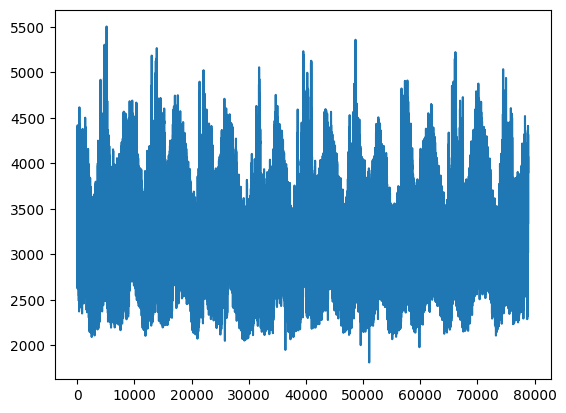

In [17]:
plt.plot(range(len(eload)), eload)

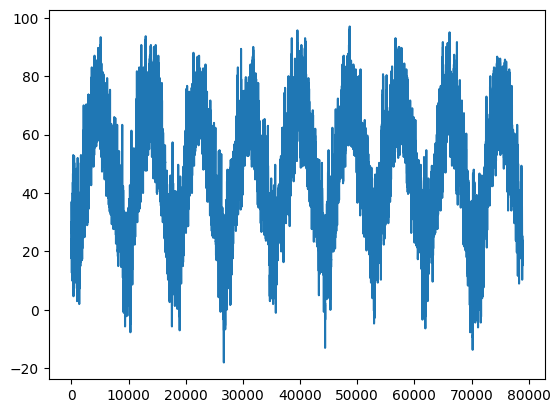

In [18]:
plt.plot(range(len(tempf)), tempf)

In [19]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 39444
num_val_samples: 19722
num_test_samples: 19722


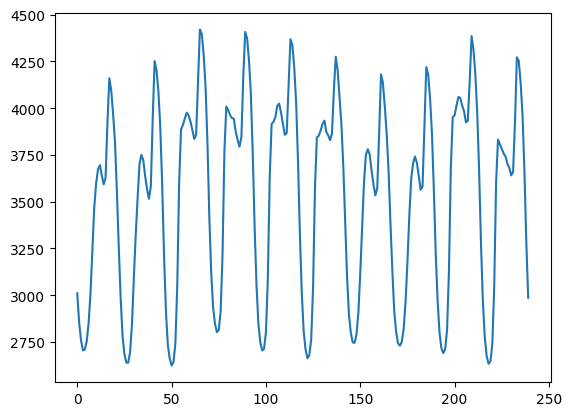

In [20]:
# Display the ELOAD for the first 10 days
plt.plot(range(240),eload[:240])

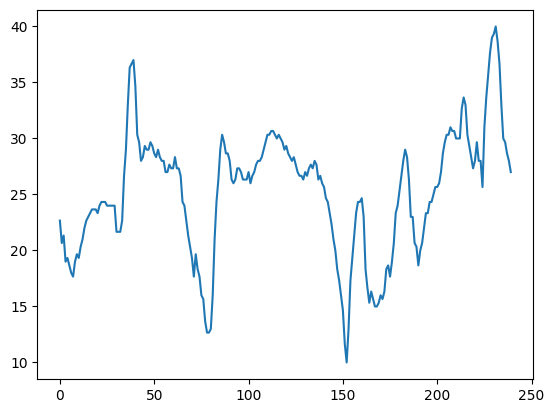

In [21]:
# Display the tempf for the first 10 days
plt.plot(range(240),tempf[:240])

##### Normalize the Data $(\dfrac{X-\mu}{\sigma})$


*   This will ensure the underlying patterns behind the data are still present
while downscaling its magnitude; making it more palatable to the Neural Network



In [22]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean # Value - Mean / Standard Deviation
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

##### Instantiating TensorFlow (TF) Datasets for Training [TR], Validation [TT], and Testing [TS]

In [23]:
# LETS JUST USE ELOAD TO FORECAST ELOAD
# THIS TIME, ( 1-input case)
# NOTE: THIS CODE HAS TO BE MODIFIED FOR THE 2-INPUT CASE, WHICH ALSO TAKES INTO CONSIDERATION THE OBSERVATIONS FROM THE TEMPERATURE (F) DATA
from tensorflow import keras

horizon = 3       # num. of hours ahead for forecast
sampling_rate = 1 # this should be kept as 1, as the sampling is already hourly
sequence_length = 15
delay = sampling_rate * (sequence_length + horizon - 1)
batch_size = 128

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=raw_data[delay:,0], # this would used "Normalized Targets"
    # targets=eload[delay:], # this would used "Not-normalized eload targets"
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,                  # changed to false JUST FOR VERIFICATION
    batch_size= num_train_samples,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],    # changed from raw_data to just eload not really
    targets=raw_data[delay:,0],  # this would used "Normalized Targets"
    # targets=eload[delay:], # this would used "Not-normalized eload targets"
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=num_val_samples,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],     # changed from raw_data to just eload
    targets=raw_data[delay:,0],  # this would used "Normalized Targets"
    # targets=eload[delay:], # this would used "Not-normalized eload targets"
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=False,
    batch_size=num_test_samples,
    start_index=num_train_samples + num_val_samples)

##### Inspecting the Output of one of the Datasets

In [24]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (39430, 15, 2)
targets shape: (39430,)


---

<center> END OF DATA PREPARATION </center>

---

---

<center> <b>[PART III.]</b> DESIGNING THE "2-INPUT (ELOAD)" PREDICTORS </center>

---

* This part of the project calls for the creation of a model that will predict the future amount of electrical energy demand or "load" (<i><u>eload</u></i>) with a prediction horizon of 3 hours into the future and 6 hours into the future. Therefore, we will have two "2-input" models for this part:

1.   2N_3HR
2.   2IN_6HR

* Per the instructions, we need AT LEAST ONE Long Short-Term Memory (LSTM) layer in our Recurrent Neural Network (RNN). Whether to use Recurrent Dropout or not is optional; however, it might improve generalization and performance. However, this comes at the cost of slow computation time due to the incompatibility with CuDNN (CUDA Deep Neural Network) Library.

In [28]:
print(targets[0])

tf.Tensor(-1.280941030053328, shape=(), dtype=float64)


In [30]:
max_value = float('-inf') # initialize variable for maximum value as negative infinity -∞
min_value = float('inf') # initialize variable for maximum value as positive infinity +∞

eload_std = std[0]
eload_mean = mean[0]

# Iterate over each batch in the dataset
for _, targets in test_dataset:
    # Find the maximum and minimum in the targets
    current_max = tf.reduce_max(targets * eload_std + eload_mean)
    current_min = tf.reduce_min(targets * eload_std + eload_mean)

    # Update the maximum and minimum values across all batches
    max_value = max(max_value, current_max.numpy())  # Update the overall max
    min_value = min(min_value, current_min.numpy())  # Update the overall min
full_range = max_value - min_value
print("MAX ELOAD IN TEST_DATASET:", max_value)
print("MIN ELOAD IN TEST_DATASET:", min_value)
print("FULL-RANGE OF ELOAD IN TEST_DATASET:", full_range)

MAX ELOAD IN TEST_DATASET: 5224.0
MIN ELOAD IN TEST_DATASET: 1979.0
FULL-RANGE OF ELOAD IN TEST_DATASET: 3245.0


---

<center> <b>[PART IIIA.]</b> DESIGNING THE "2-INPUT (ELOAD, TEMPF)" PREDICTOR FOR "3-HOUR HORIZON" </center>

---


In [56]:
# INITIALIZE THE SIZE/DIMENSIONS OF INPUT AND OUTPUT
output_units = 1 # will only output 1 prediction

In [32]:
model = Sequential([
    LSTM(100, return_sequences=True),
    Dropout(0.1),  # Apply dropout separately
    LSTM(100),
    Dense(output_units)
])

In [33]:
# COMPILE THE MODEL
model.compile(optimizer='adam', loss='mse',metrics=['mae'])

In [34]:
# CALLBACKS FOR MONITORING AND PLOTTING
val_loss_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# CALLBACK FOR EARLY STOPPING
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [35]:
# Function to store metrics and plot them after training
def plot_metrics(history):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Create a figure with subplots arranged in 2x2

    # Plot for full history
    axes[0, 0].plot(history['loss'], color='blue', linestyle='-', marker='o', label='Training Loss')
    axes[0, 0].plot(history['val_loss'], color='orange', linestyle='--', marker='^', label='Validation Loss')
    axes[0, 0].set_title('Training and Validation Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    axes[0, 1].plot(history['mae'], color='blue', linestyle='-', marker='o', label='Training MAE')
    axes[0, 1].plot(history['val_mae'], color='orange', linestyle='--', marker='^', label='Validation MAE')
    axes[0, 1].set_title('Training and Validation MAE')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('MAE')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Find the epoch with the best validation loss
    best_epoch = np.argmin(history['val_loss'])

    # Plot for clipped history up to best validation loss
    axes[1, 0].plot(history['loss'][:best_epoch+1], color='blue', linestyle='-', marker='o', label='Training Loss')
    axes[1, 0].plot(history['val_loss'][:best_epoch+1], color='orange', linestyle='--', marker='^', label='Validation Loss')
    axes[1, 0].set_title('Clipped Training and Validation Loss')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Loss')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    axes[1, 1].plot(history['mae'][:best_epoch+1], color='blue', linestyle='-', marker='o', label='Training MAE')
    axes[1, 1].plot(history['val_mae'][:best_epoch+1], color='orange', linestyle='--', marker='^', label='Validation MAE')
    axes[1, 1].set_title('Clipped Training and Validation MAE')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('MAE')
    axes[1, 1].legend()
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
# TRAIN THE MODEL WITH CALLBACKS
history = model.fit(train_dataset, epochs=200, validation_data=val_dataset,
                    callbacks=[val_loss_checkpoint, early_stopping])

# AFTER THE TRAINING IS COMPLETE, PLOT THE METRICS USING THE HISTORY OBJECT
plot_metrics(history.history)

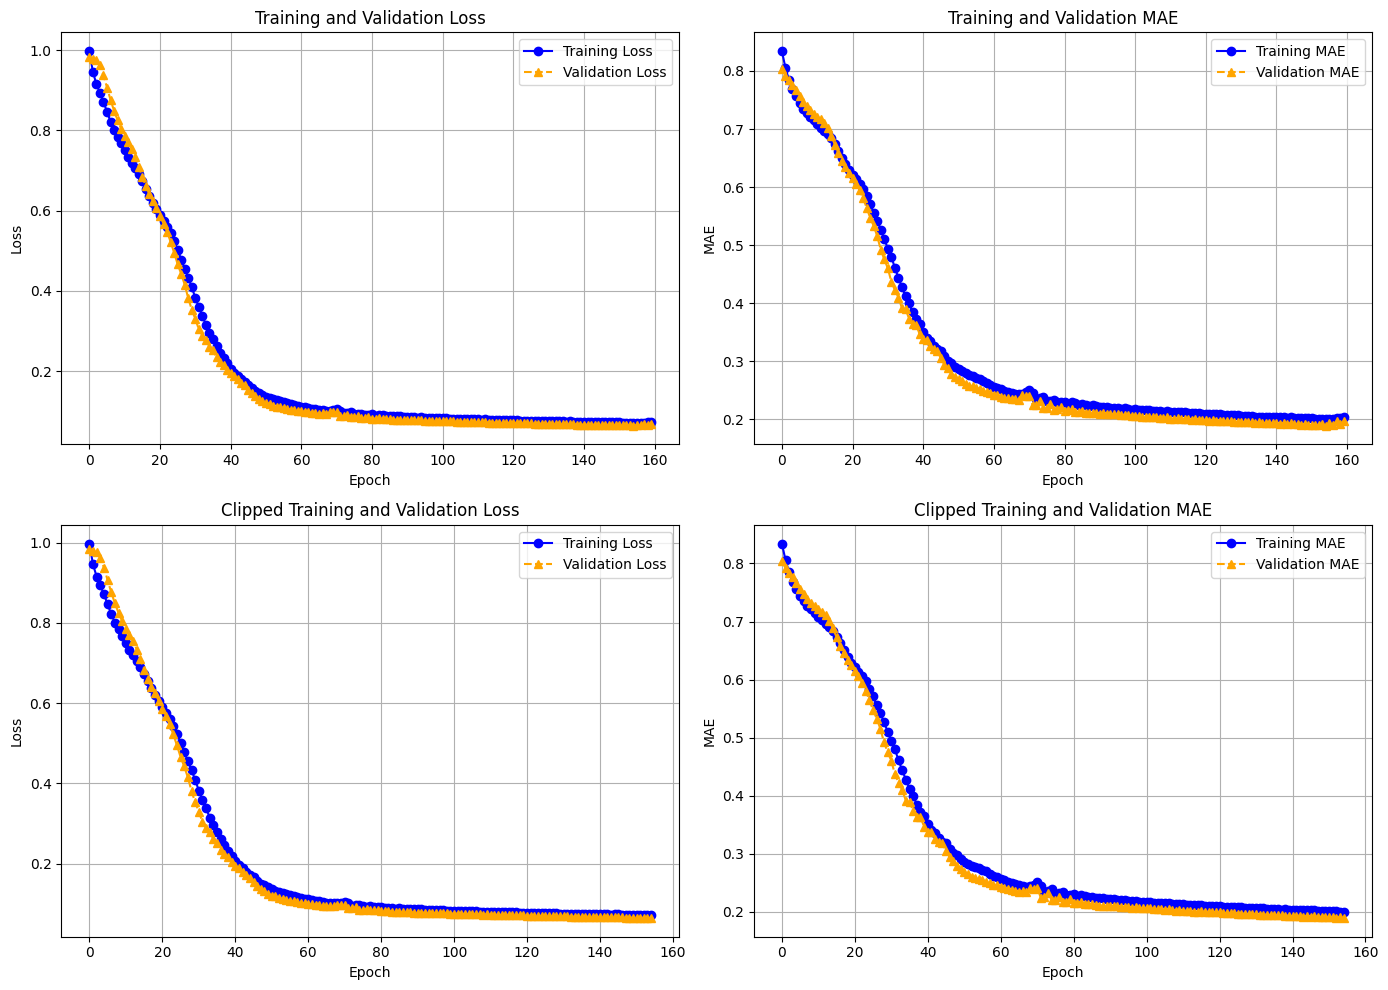

In [37]:
# PRINT THE MODEL SUMMARY
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 100)         41200     
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 121701 (475.39 KB)
Trainable params: 121701 (475.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
predictions = model.predict(test_dataset) # this will return the predictions in the scale of the normalized/standardized data

1/1 [==============================] - 1s 1s/step


In [42]:
predictions.shape

(19691, 1)

##### De-Normalize the Data $(X*\sigma+\mu)$


*   Return the predictions array back to its original form when analyzing the $MAE$ and $PMAE$

In [43]:
predictions_original_scale = predictions * std[0] + mean[0]

In [48]:
targets.shape

TensorShape([19691])

In [ ]:
for samples, targets in test_dataset.take(1):
    print("Samples: \n", samples.numpy() * std + mean)
    print("Targets: \n", targets.numpy() * std[0] + mean[0])

In [50]:
target_values = []
for batch in test_dataset:
  targets = batch[1]
  target_values.extend(targets * std[0] + mean[0])
target_values = np.array(target_values)
print("targets_values shape: ", target_values.shape)

targets_values shape:  (19691,)


$MAE=\sum_{i=1}^{n}\dfrac{\vert y_{i}-x_{i}\vert}{n}$

Where:

$MAE$=Mean Absolute Error \\
$x_{i}$=i$^{th}$ Input Sample/Pattern \\
$y_{i}$=i$^{th}$ Target Respective to Input \\
$n$=Total Number of Data Points

In [51]:
mae = mean_absolute_error(target_values, predictions_original_scale)
print("MAE on the Test Set:", mae)

MAE on the Test Set: 122.60997816038062


$PMAE=\dfrac{MAE_{[TS]}}{FR_{[TS]}}$

In [52]:
pmae = (mae / full_range) * 100
print("Percentage Mean Absolute Error (PMAE):", pmae)

Percentage Mean Absolute Error (PMAE): 3.778427678285998


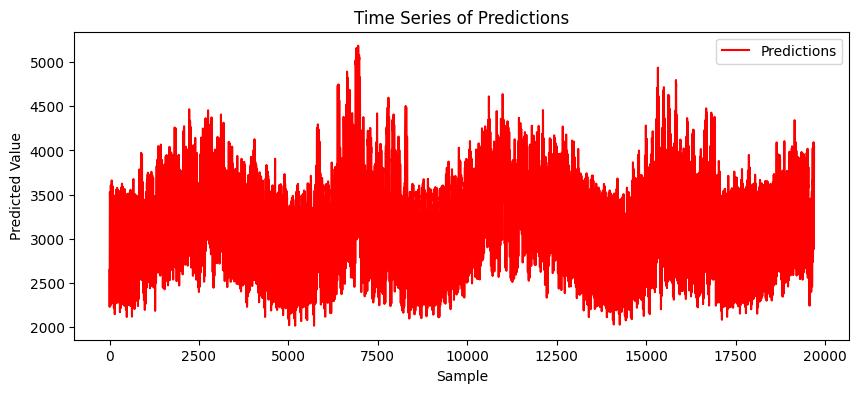

In [53]:
# TIMESERIES PLOT OF PREDICTED VALUES BY MODEL
plt.figure(figsize=(10, 4))
plt.plot(predictions_original_scale, 'r', label='Predictions')
plt.title('Time Series of Predictions')
plt.xlabel('Sample')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

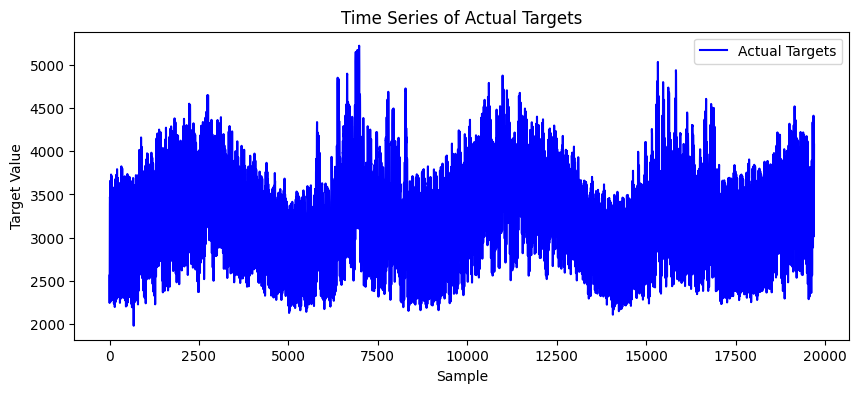

In [54]:
# TIMESERIES PLOT OF CORRESPONDING TARGETS
plt.figure(figsize=(10, 4))
plt.plot(target_values, 'b', label='Actual Targets')
plt.title('Time Series of Actual Targets')
plt.xlabel('Sample')
plt.ylabel('Target Value')
plt.legend()
plt.show()

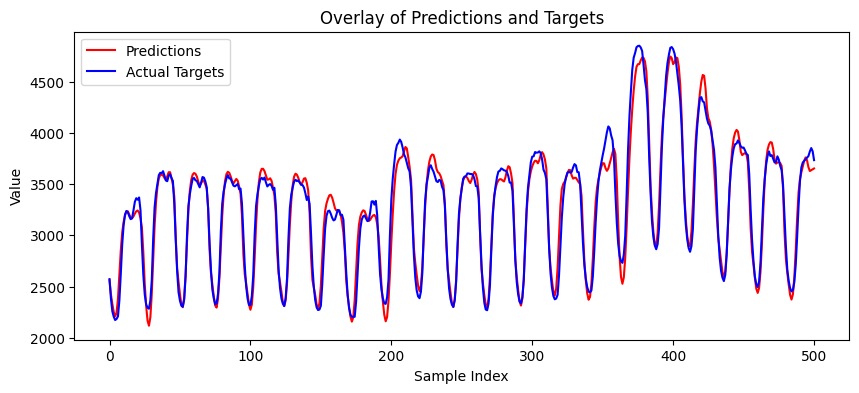

In [55]:
# OVERLAY PLOT OF PREDICTIONS (RED SOLID LINE) AND TARGETS (BLUE SOLID LINE) (6,000:6,500)
plt.figure(figsize=(10, 4))
plt.plot(predictions_original_scale[6000:6501], 'r', label='Predictions', linestyle='-')
plt.plot(target_values[6000:6501], 'b', label='Actual Targets', linestyle='-')
plt.title('Overlay of Predictions and Targets')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()